# Dump a single spectrum
=======================================



- Author Sylvie Dagoret-Campagne
- Creation date Friday 5th 2016


## Import packages
-------------------------

In [48]:
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [49]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [50]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-07-08 11:20:19.084711
fits date format for the analysis :  2016-07-08T11:20:19


## Few definitions
-----------------------

- file index
- object name
- filename
- path

In [51]:
fileindex=22;  # file number

In [52]:
object_name='HD158485_grat_'+str(fileindex)   # object name

In [53]:
#path
path_spectrum=path='./HD158485_grat'+'_spectra'   # path where is the spectra

## Dump file spectra
---------------------------


### A) Open the file 

In [54]:
# basefilename
basefilename_spectrum='dataspec_'+object_name+'.fits'   # build the base filename

In [55]:
fullfilename_spectrum=os.path.join(path_spectrum,basefilename_spectrum)  # build the full filename

In [56]:
hdulist=fits.open(fullfilename_spectrum)     # open the file
hdulist.info()                               # show the file content

Filename: ./HD158485_grat_spectra/dataspec_HD158485_grat_22.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     559   ()              
1                BinTableHDU     12   2617R x 2C   [E, E]   
2                BinTableHDU     18   3729R x 5C   [E, E, E, E, E]   


In [57]:
header=hdulist[0].header       # get file header

In [58]:
#header  # : to view the raw data header

### B) Get the produced spectrum data 

In [59]:
table_data1=hdulist[1].data
table_data1.columns  # shows the columns names of the table

ColDefs(
    name = 'WAVELENGTH'; format = 'E'
    name = 'SPECTRUMDATA'; format = 'E'
)

In [60]:
specdata_wavelength=table_data1.field('WAVELENGTH')
specdata_flux=table_data1.field('SPECTRUMDATA')

### C) get the simulated prediction

In [61]:
table_data2=hdulist[2].data
table_data2.columns  # shows the columns names of the table

ColDefs(
    name = 'WAVELENGTH'; format = 'E'
    name = 'SEDcalspec'; format = 'E'
    name = 'SEDxQE'; format = 'E'
    name = 'SEDxQExATM'; format = 'E'
    name = 'SEDxQExATMxTopt'; format = 'E'
)

In [62]:
wavelength_sed=table_data2.field('WAVELENGTH')
flux_sed=table_data2.field('SEDcalspec')
flux_sedccd=table_data2.field('SEDxQE')
flux_sedccdatm=table_data2.field('SEDxQExATM')
flux_sedccdatmopt=table_data2.field('SEDxQExATMxTopt')

In [63]:
SED1=flux_sed
SED2=flux_sedccd
SED3=flux_sedccdatm
SED4=flux_sedccdatmopt
SED5=SED4

### Show the data and simulation

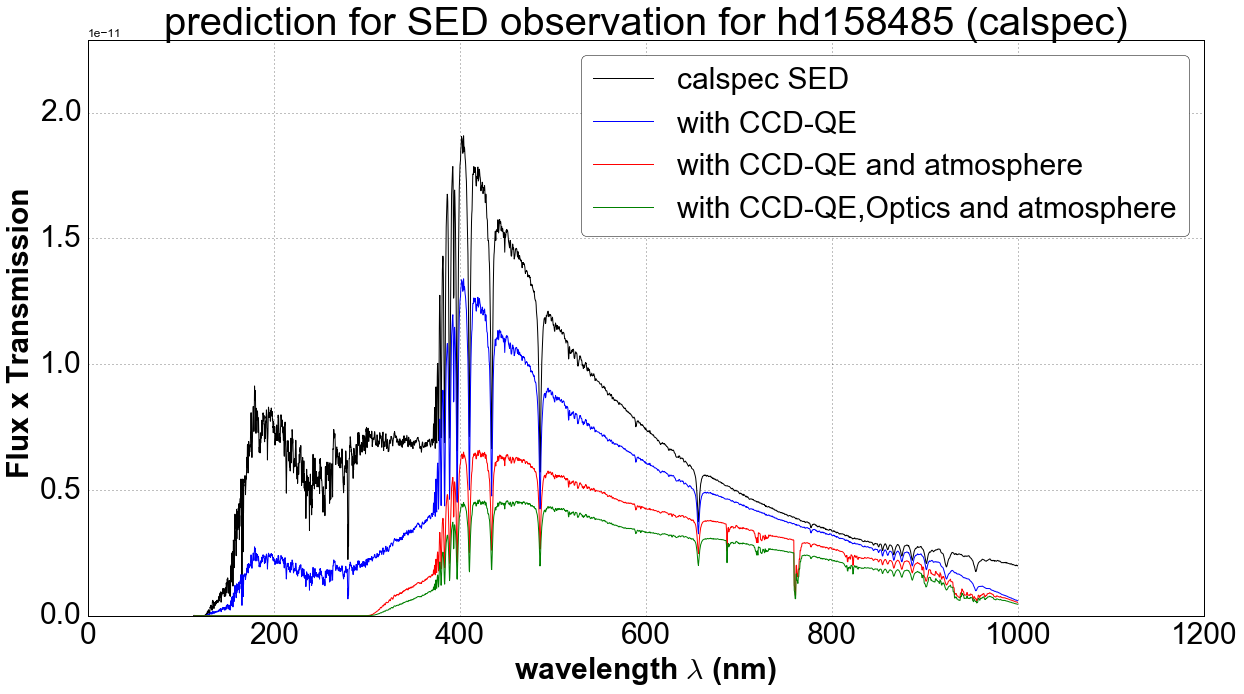

In [64]:
plt.figure(figsize=(20,10))
plt.plot(wavelength_sed,SED1,label='calspec SED',color='k')
plt.plot(wavelength_sed,SED2,label='with CCD-QE',color='b')
plt.plot(wavelength_sed,SED3,label='with CCD-QE and atmosphere',color='r')
plt.plot(wavelength_sed,SED4,label='with CCD-QE,Optics and atmosphere',color='g')
plt.xlim(0,1200.)
plt.ylim(0,SED1.max()*1.2)
plt.title('prediction for SED observation for hd158485 (calspec)',fontsize=40)
plt.xlabel('wavelength $\lambda$ (nm)',fontsize=30)
plt.ylabel('Flux x Transmission ',fontsize=30)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.legend(fontsize=30)
plt.show()

(0.0, 1000.0)

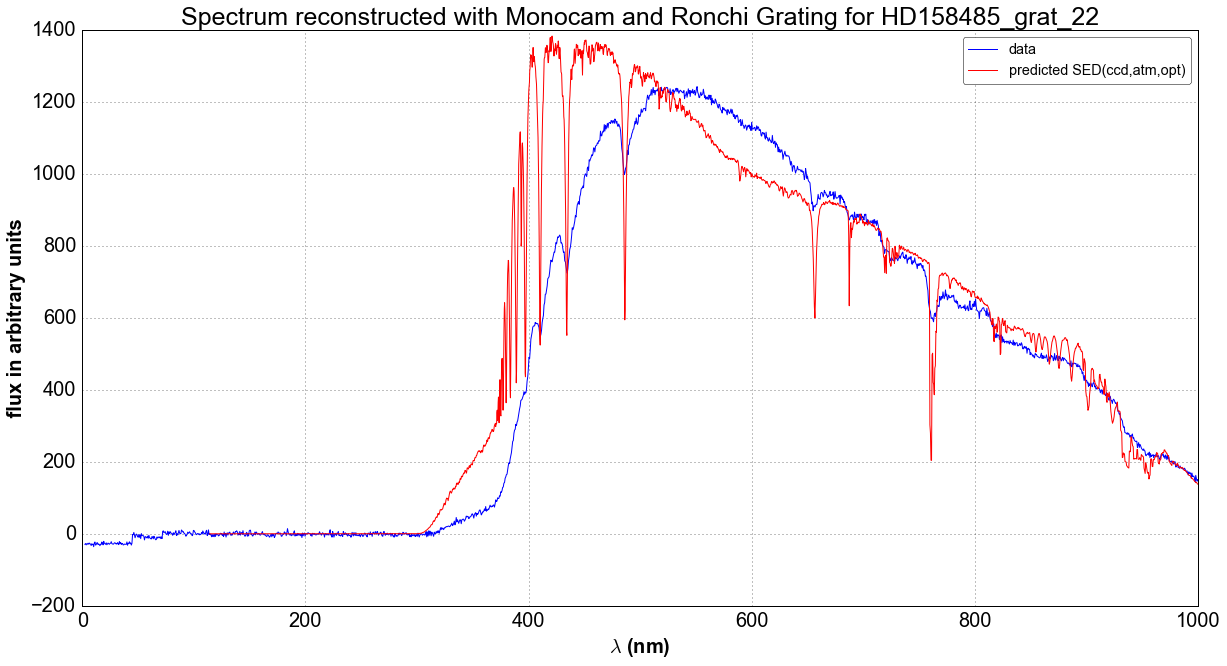

In [65]:
plt.figure(figsize=(20.,10.))
plt.plot(specdata_wavelength,specdata_flux,label='data',color='b')
plt.plot(wavelength_sed,SED5*3e14,label='predicted SED(ccd,atm,opt)',color='r')
the_title='Spectrum reconstructed with Monocam and Ronchi Grating for {}'.format(object_name)
plt.title(the_title,fontsize=25)
plt.xlabel('$\lambda$ (nm)',fontsize=20)
plt.ylabel(' flux in arbitrary units ',fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(loc='best')
plt.xlim(0.,1000.)